<a href="https://colab.research.google.com/github/Sandesh10/Data-Challenge-2020/blob/master/Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How do people’s information-related self-efficacy (A5) and their health-related self- efficacy (F2 &amp; N4) relate to

a. their use of social media for health information seeking or sharing (B14),

b. their self-reported health status (F1),

c. their avoidance of doctors (F3),

d. and their perceived social support (F5)?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA

In [0]:
df = pd.read_excel('data_level4.xlsx')



In [0]:
'''
    Preprocessing steps:
    1. Removing all the columns after index 359. This includes all columns after `MAILNUM` column. 
    2. Remove all the columns with object datatype. 
'''
def preprocess_df(df):
  remove_df = df.iloc[:,359:]
  df = df.drop(remove_df.columns, axis=1)
  object_cols = list(df.select_dtypes(include=['object']).columns)
  print('Removing following columns', object_cols)
  date_cols = list(df.select_dtypes(include=['datetime']).columns)
  print('Removing following columns', date_cols)
  new_df = df.drop(object_cols, axis=1)
  new_df = new_df.drop(date_cols, axis=1)
  print('Removing column : Prompt . [P.S. This contains NaN]')
  new_df = new_df.drop(['Prompt'],axis =1)
  print("New dataframe shape ", new_df.shape)
  return new_df

In [0]:
new_df = preprocess_df(df)

Removing following columns ['PersonID', 'Stratum', 'APP_REGION', 'VAR_STRATUM', 'StrongNeedHealthInfo_OS', 'HealthIns_Other_OS', 'Caregiving_Other_OS', 'CaOther_OS', 'SexualOrientation_OS']
Removing following columns ['UpdateDate']
Removing column : Prompt . [P.S. This contains NaN]
New dataframe shape  (5438, 348)


In [0]:
def create_bar_plot(df,col_ls_1,col_ls_2, figsize = (15,7), st=0, title=""):
  temp = df[col_ls_2]
  if st==0:
    temp.groupby(col_ls_1).count().plot(kind='bar', figsize = figsize)
  else:
    temp.groupby(col_ls_1).count().unstack(level=1).plot.bar(stacked=True,
              title=title,figsize = (15,7))

def analyse_data(df,col_1, col_2, col_3, st=0, title=""):
  #removing the rows with missing data
  temp_df = df[df[col_1]>0]
  print("Shape after Filtering ",col_1," : ",temp_df.shape)

  #removing the rows with missing data
  temp_df_2 = temp_df[temp_df[col_2]>0]
  print("Shape after Filtering ",col_2," : ",temp_df_2.shape)
  res = temp_df_2.groupby([col_1,col_2]).count()
  print(res)
  create_bar_plot(temp_df_2, [col_1,col_2], [col_1,col_2, col_3], st, title)
  print('Done!!')


 ConfidentGetHealthInf

  A5. Overall, how confident are you that you could get advice or information about health or medical topics if you needed it?

    1.  Completely confident     2.  Very confident
    3.  Somewhat confident       4.  A little confident
    5.  Not confident at all


OwnAbilityTakeCareHealth

F2. Overall, how confident are you about your ability to take good care of your health?

    1.  Completely confident     2.  Very confident
    3.  Somewhat confident       4.  A little confident
    5.  Not confident at all

EverythingCauseCancer

N4a. How much do you agree or disagree: It seems like everything causes cancer

    1.  Strongly agree            2. Somewhat agree
    3.  Somewhat disagree         4. Strongly disagree


PreventNotPossible

N4b. How much do you agree or disagree: There’s not much you can do to lower your chances of getting cancer

    1.  Strongly agree            2. Somewhat agree
    3.  Somewhat disagree         4. Strongly disagree



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(5184, 348)
                             HHID  HIGHSPANLI  ...  IncomeFeelings  MAILNUM
PreventNotPossible AvoidDoc                    ...                         
1                  1          455         455  ...             455      455
                   2         1093        1093  ...            1093     1093
2                  1          819         819  ...             819      819
                   2         2765        2765  ...            2765     2765

[4 rows x 346 columns]


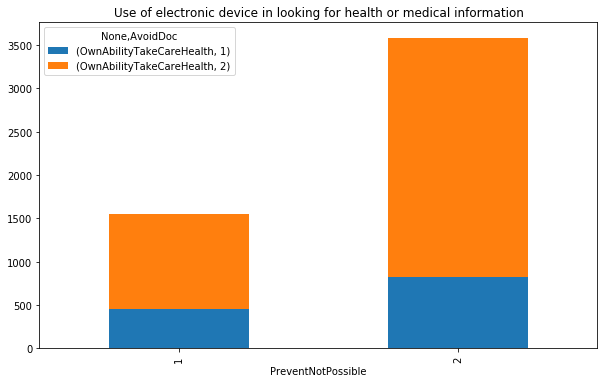

In [0]:
new_df2 = new_df[new_df['PreventNotPossible']>0]
new_df2['PreventNotPossible'] = new_df2['PreventNotPossible'].apply(lambda x: 1 if x<=2 else (2 if x>2 and x<=4 else 3))
print(new_df2.shape)
new_df3 = new_df2[new_df2['AvoidDoc']>0]
# new_df3['AvoidDoc'] = new_df3['AvoidDoc'].apply(lambda x: 1 if x<=2 else (2 if x>2 and x<=4 else 3))
print(new_df3.groupby(['PreventNotPossible','AvoidDoc']).count())
temp = new_df3[['PreventNotPossible','AvoidDoc','OwnAbilityTakeCareHealth']]
temp.groupby(['PreventNotPossible','AvoidDoc']).count().unstack(level=1).plot.bar(stacked=True,
              title='Use of electronic device in looking for health or medical information',figsize = (10,6))

Shape after Filtering  ConfidentGetHealthInf  :  (5308, 348)
Shape after Filtering  OwnAbilityTakeCareHealth  :  (5225, 348)
                                                HHID  ...  MAILNUM
ConfidentGetHealthInf OwnAbilityTakeCareHealth        ...         
1                     1                          633  ...      633
                      2                          531  ...      531
                      3                          168  ...      168
                      4                           27  ...       27
                      5                           11  ...       11
2                     1                          445  ...      445
                      2                         1066  ...     1066
                      3                          407  ...      407
                      4                           39  ...       39
                      5                           11  ...       11
3                     1                          235  ...      235
    

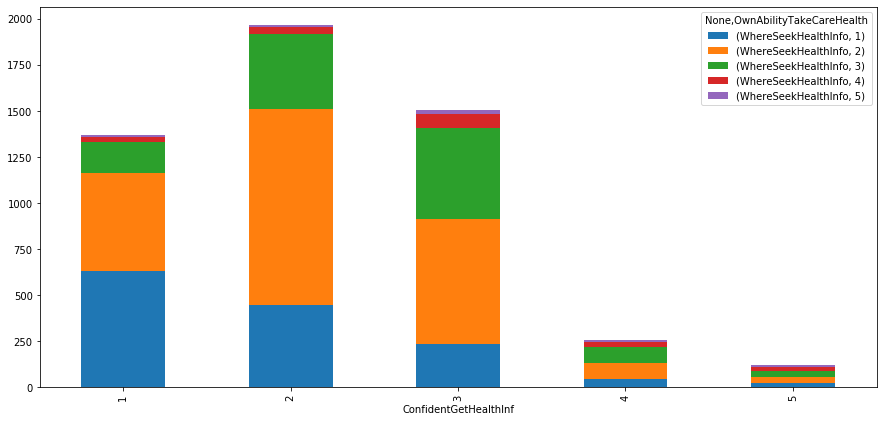

In [0]:
# ConfidentGetHealthInf vs OwnAbilityTakeCareHealth

analyse_data(new_df,'ConfidentGetHealthInf','OwnAbilityTakeCareHealth','WhereSeekHealthInfo')

(5119, 348)
                                             HHID  ...  MAILNUM
ConfidentGetHealthInf EverythingCauseCancer        ...         
1                     1                       333  ...      333
                      2                       546  ...      546
                      3                       244  ...      244
                      4                       210  ...      210
2                     1                       355  ...      355
                      2                       947  ...      947
                      3                       380  ...      380
                      4                       254  ...      254
3                     1                       311  ...      311
                      2                       738  ...      738
                      3                       297  ...      297
                      4                       142  ...      142
4                     1                        87  ...       87
                      2     

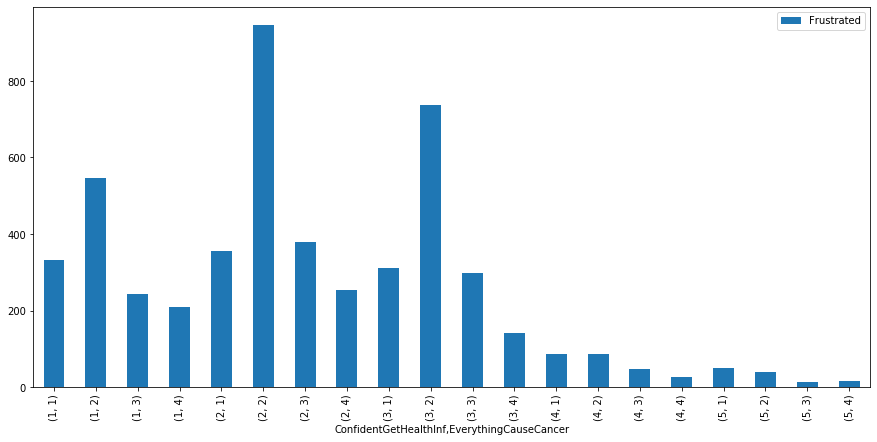

In [0]:
## ConfidentGetHealthInf vs EverythingCauseCancer

temp_df = new_df[(new_df['ConfidentGetHealthInf']>0) & (new_df['EverythingCauseCancer']>0)]
print(temp_df.shape)
print(temp_df.groupby(['ConfidentGetHealthInf','EverythingCauseCancer']).count())
temp = temp_df[['ConfidentGetHealthInf','EverythingCauseCancer','Frustrated']]
temp.groupby(['ConfidentGetHealthInf','EverythingCauseCancer']).count().plot(kind='bar', figsize = (15,7))

In [0]:
## ConfidentGetHealthInf vs OwnAbilityTakeCareHealth vs EverythingCauseCancer

temp_df = new_df[(new_df['ConfidentGetHealthInf']>0) & (new_df['OwnAbilityTakeCareHealth']>0) & (new_df['EverythingCauseCancer']>0)]
print(temp_df.shape)
pd.set_option('display.max_rows', 100)
temp_df.groupby(['ConfidentGetHealthInf','OwnAbilityTakeCareHealth', 'EverythingCauseCancer']).count().iloc[:,:2]

(5070, 348)


HHID  HIGHSPANLI
ConfidentGetHealthInf OwnAbilityTakeCareHealth EverythingCauseCancer                  
1                     1                        1                       164         164
                                               2                       217         217
                                               3                       114         114
                                               4                       110         110
                      2                        1                       109         109
                                               2                       240         240
                                               3                        94          94
                                               4                        73          73
                      3                        1                        46          46
                                               2                        74          74
                                               3                        22          22
                                               4                        21          21
                      4                        1                         8           8
                                               2                         7           7
                                               3                        11          11
                                               4                         1           1
                      5                        1                         4           4
                                               2                         2           2
                                               3                         2           2
                                               4                         3           3
2                     1                        1                        72          72
                                               2                       203         203
                                               3                        91          91
                                               4                        66          66
                      2                        1                       193         193
                                               2                       519         519
                                               3                       202         202
                                               4                       132         132
                      3                        1                        79          79
                                               2                       193         193
                                               3                        79          79
                                               4                        47          47
                      4                        1                         6           6
                                               2                        21          21
                                               3                         6           6
                                               4                         4           4
                      5                        1                         4           4
                                               2                         4           4
                                               3                         1           1
                                               4                         1           1
3                     1                        1                        53          53
                                               2                       100         100
                                               3                        51          51
                                               4                        25          25
                      2                        1                    

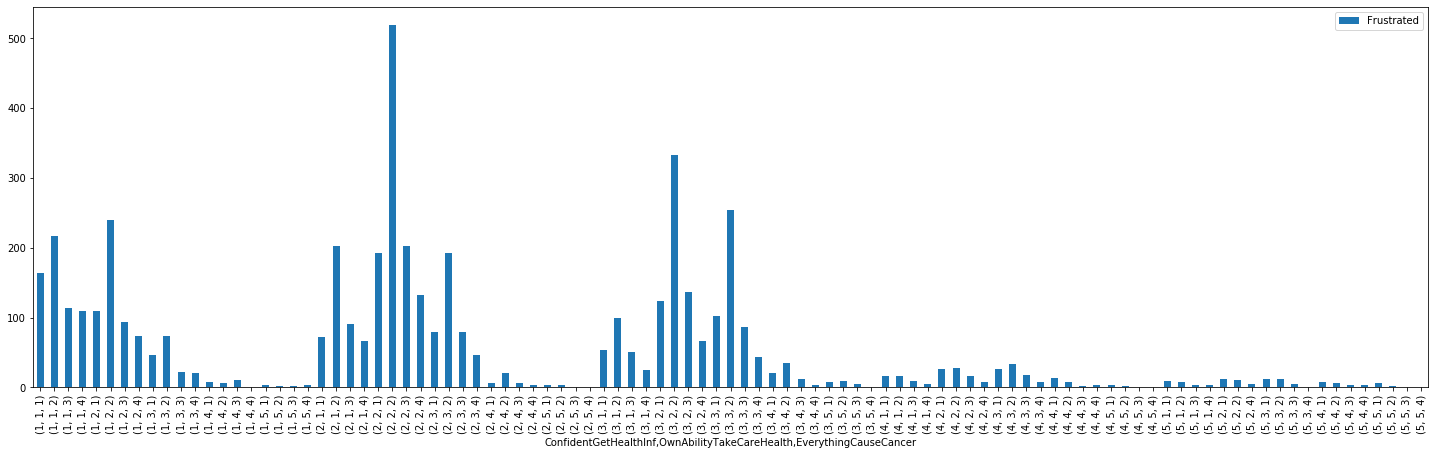

In [0]:
temp = temp_df[['ConfidentGetHealthInf','OwnAbilityTakeCareHealth','EverythingCauseCancer','Frustrated']]
temp.groupby(['ConfidentGetHealthInf','OwnAbilityTakeCareHealth','EverythingCauseCancer']).count().plot(kind='bar', figsize = (25,7))

In [0]:
y = new_df['ConfidentGetHealthInf']
X = new_df[['OwnAbilityTakeCareHealth','EverythingCauseCancer','Frustrated',
            'IntRsn_VisitedSocNet','IntRsn_SharedSocNet','IntRsn_WroteBlog',
            'IntRsn_SupportGroup','IntRsn_YouTube']]
print(X.shape, y.shape)
reg = linear_model.LinearRegression()
reg_output = reg.fit(X,y)
print(reg_output.coef_)

(5438, 8) (5438,)
[ 0.10258004 -0.00234426  0.13998701 -0.05531453 -0.03662636  0.0270888
  0.09240143 -0.03251346]


In [0]:
linear_regression = sm.OLS(y, X)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     ConfidentGetHealthInf   R-squared (uncentered):                   0.452
Model:                               OLS   Adj. R-squared (uncentered):              0.451
Method:                    Least Squares   F-statistic:                              559.8
Date:                   Wed, 26 Feb 2020   Prob (F-statistic):                        0.00
Time:                           01:08:24   Log-Likelihood:                         -11574.
No. Observations:                   5438   AIC:                                  2.316e+04
Df Residuals:                       5430   BIC:                                  2.322e+04
Df Model:                              8                                                  
Covariance Type:               nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
OwnAbilityTakeCareHealth     0.3168      0.015     20.749      0.000       0.287       0.347
EverythingCauseCancer        0.0725      0.012      5.892      0.000       0.048       0.097
Frustrated                   0.1829      0.010     19.238      0.000       0.164       0.202
IntRsn_VisitedSocNet        -0.0900      0.036     -2.491      0.013      -0.161      -0.019
IntRsn_SharedSocNet          0.0247      0.041      0.608      0.543      -0.055       0.105
IntRsn_WroteBlog             0.1288      0.042      3.045      0.002       0.046       0.212
IntRsn_SupportGroup          0.2949      0.054      5.482      0.000       0.189       0.400
IntRsn_YouTube              -0.0928      0.033     -2.794      0.005      -0.158      -0.028
==============================================================================
Omnibus:                     2601.910   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33345.988
Skew:                          -1.958   Prob(JB):                         0.00
Kurtosis:                      14.482   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
y1 = new_df['ConfidentGetHealthInf']
X1 = new_df[['OwnAbilityTakeCareHealth','EverythingCauseCancer','Frustrated','GeneralHealth','AvoidDoc','TalkHealthFriends']]
print(X1.shape, y1.shape)
reg = linear_model.LinearRegression()
reg_output1 = reg.fit(X1,y1)
print(reg_output1.coef_)

(5438, 6) (5438,)
[ 0.22690663  0.01168242  0.14689914 -0.00600704 -0.2095721   0.000774  ]


In [0]:
linear_regression = sm.OLS(y1, X1)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     ConfidentGetHealthInf   R-squared (uncentered):                   0.441
Model:                               OLS   Adj. R-squared (uncentered):              0.441
Method:                    Least Squares   F-statistic:                              715.3
Date:                   Wed, 26 Feb 2020   Prob (F-statistic):                        0.00
Time:                           01:10:28   Log-Likelihood:                         -11626.
No. Observations:                   5438   AIC:                                  2.326e+04
Df Residuals:                       5432   BIC:                                  2.330e+04
Df Model:                              6                                                  
Covariance Type:               nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
OwnAbilityTakeCareHealth     0.3016      0.029     10.395      0.000       0.245       0.358
EverythingCauseCancer        0.1155      0.012      9.405      0.000       0.091       0.140
Frustrated                   0.2116      0.009     22.519      0.000       0.193       0.230
GeneralHealth                0.2850      0.024     11.911      0.000       0.238       0.332
AvoidDoc                     0.0035      0.033      0.105      0.916      -0.062       0.069
TalkHealthFriends           -0.2870      0.035     -8.206      0.000      -0.356      -0.218
==============================================================================
Omnibus:                     2599.028   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29968.529
Skew:                          -1.992   Prob(JB):                         0.00
Kurtosis:                      13.788   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
y2 = new_df['ConfidentGetHealthInf']
X2 = new_df[['OwnAbilityTakeCareHealth','EverythingCauseCancer','Frustrated','IntRsn_VisitedSocNet','IntRsn_SharedSocNet',
             'IntRsn_WroteBlog','IntRsn_SupportGroup','IntRsn_YouTube','GeneralHealth','AvoidDoc','TalkHealthFriends']]
print(X2.shape, y2.shape)
reg = linear_model.LinearRegression()
reg_output2 = reg.fit(X2,y2)
print(reg_output2.coef_)

(5438, 11) (5438,)
[ 0.2250038   0.01073978  0.14422649 -0.05283662 -0.04197749  0.02074025
  0.10340946 -0.0314157  -0.00392598 -0.21071203  0.00041217]


In [0]:
linear_regression = sm.OLS(y2, X2)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     ConfidentGetHealthInf   R-squared (uncentered):                   0.466
Model:                               OLS   Adj. R-squared (uncentered):              0.465
Method:                    Least Squares   F-statistic:                              429.9
Date:                   Wed, 26 Feb 2020   Prob (F-statistic):                        0.00
Time:                           01:11:05   Log-Likelihood:                         -11505.
No. Observations:                   5438   AIC:                                  2.303e+04
Df Residuals:                       5427   BIC:                                  2.310e+04
Df Model:                             11                                                  
Covariance Type:               nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
OwnAbilityTakeCareHealth     0.2653      0.028      9.314      0.000       0.209       0.321
EverythingCauseCancer        0.0722      0.012      5.843      0.000       0.048       0.096
Frustrated                   0.1800      0.009     19.061      0.000       0.162       0.199
IntRsn_VisitedSocNet        -0.1047      0.036     -2.930      0.003      -0.175      -0.035
IntRsn_SharedSocNet          0.0238      0.040      0.591      0.554      -0.055       0.103
IntRsn_WroteBlog             0.1237      0.042      2.960      0.003       0.042       0.206
IntRsn_SupportGroup          0.2662      0.053      4.995      0.000       0.162       0.371
IntRsn_YouTube              -0.0769      0.033     -2.340      0.019      -0.141      -0.012
GeneralHealth                0.2203      0.024      9.238      0.000       0.174       0.267
AvoidDoc                    -0.0441      0.033     -1.347      0.178      -0.108       0.020
TalkHealthFriends           -0.2394      0.034     -6.960      0.000      -0.307      -0.172
==============================================================================
Omnibus:                     2831.753   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35550.871
Skew:                          -2.199   Prob(JB):                         0.00
Kurtosis:                      14.728   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""